# Stock Analysis from Quandl


## Objective:
- Analyze the trend in stocks prices of leading banks over the years.
- Identify the anomalies in pattern due to the great recession.
- Analyze the risk of investing in a particular stock (simple standard deviation method)

I will scrape the financial stock prices and volume directly from the website from Quandl (2006 to 2018) for the following leading banks:

- Bank of America (BOA)
- CitiGroup (C)
- Goldman Sachs (GS)
- JPMorgan Chase (JPM)
- Morgan Stanley (MS)
- Wells Fargo (WFC)

In [8]:
# Importing Libraries 

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

import numpy as np
import datetime
import matplotlib as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [9]:
# Disabling warnings
import warnings
warnings.filterwarnings('ignore')

### Scraping data from Quandl

In [10]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2018, 1, 1)

In [11]:
# Bank of America
BAC = data.DataReader("BAC", 'quandl', start, end)
BAC = BAC.filter(['Open','High','Low','Close','Volume'], axis=1)
BAC = BAC.reset_index().sort_values('Date').set_index('Date')
# CitiGroup
C = data.DataReader("C", 'quandl', start, end)
C = C.filter(['Open','High','Low','Close','Volume'], axis=1)
C = C.reset_index().sort_values('Date').set_index('Date')
# Goldman Sachs
GS = data.DataReader("GS", 'quandl', start, end)
GS = GS.filter(['Open','High','Low','Close','Volume'], axis=1)
GS = GS.reset_index().sort_values('Date').set_index('Date')
# JPMorgan Chase 
JPM = data.DataReader("JPM", 'quandl', start, end)
JPM = JPM.filter(['Open','High','Low','Close','Volume'], axis=1)
JPM = JPM.reset_index().sort_values('Date').set_index('Date')
# Morgan Stanley
MS = data.DataReader("MS", 'quandl', start, end)
MS = MS.filter(['Open','High','Low','Close','Volume'], axis=1)
MS = MS.reset_index().sort_values('Date').set_index('Date')
# Wells Fargo
WFC = data.DataReader("WFC", 'quandl', start, end)
WFC = WFC.filter(['Open','High','Low','Close','Volume'], axis=1)
WFC = WFC.reset_index().sort_values('Date').set_index('Date')


In [12]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']


## Data overview

In [13]:
bank_stocks.head()

Bank Ticker    BAC                                       C                \
Stock Info    Open   High    Low  Close      Volume   Open   High    Low   
Date                                                                       
2006-01-03   46.92  47.18  46.15  47.08  16296700.0  49.00  49.38  48.11   
2006-01-04   47.00  47.24  46.45  46.58  17757900.0  48.86  49.10  48.35   
2006-01-05   46.58  46.83  46.32  46.64  14970700.0  48.44  48.78  48.40   
2006-01-06   46.80  46.91  46.35  46.57  12599800.0  48.88  48.90  48.20   
2006-01-09   46.72  46.97  46.36  46.60  15619400.0  48.60  48.74  48.30   

Bank Ticker                       ...         MS                         \
Stock Info   Close      Volume    ...       Open   High      Low  Close   
Date                              ...                                     
2006-01-03   49.29  15376000.0    ...      57.17  58.49  56.7400  58.31   
2006-01-04   48.38  18709000.0    ...      58.70  59.28  58.3500  58.35   
2006-01-05   48.62  11431000.0    ...      58.55  58.59  58.0200  58.51   
2006-01-06   48.62  13702000.0    ...      58.77  58.85  58.0500  58.57   
2006-01-09   48.39  16807000.0    ...      58.63  59.29  58.6244  59.19   

Bank Ticker               WFC                                  
Stock Info      Volume   Open   High    Low  Close     Volume  
Date                                                           
2006-01-03   5377000.0  63.20  63.95  62.39  63.80  5508200.0  
2006-01-04   7977800.0  63.60  63.64  62.73  63.06  5435000.0  
2006-01-05   5778000.0  63.00  63.11  62.62  62.99  5079000.0  
2006-01-06   6889800.0  63.16  63.55  62.77  63.36  4201900.0  
2006-01-09   4144500.0  63.35  63.65  63.11  63.35  2809800.0  

[5 rows x 30 columns]

In [15]:
bank_stocks.describe()

Bank Ticker          BAC                                                       \
Stock Info          Open         High          Low        Close        Volume   
count        3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03   
mean           21.845763    22.107245    21.556164    21.822173  1.268290e+08   
std            14.157541    14.249728    14.058660    14.157000  1.191630e+08   
min             3.220000     3.510000     2.530000     3.140000  4.835400e+06   
25%            13.110000    13.300000    12.920000    13.090000  5.496273e+07   
50%            16.050000    16.220000    15.830000    16.040000  9.597790e+07   
75%            25.305000    25.580000    25.025000    25.240000  1.606200e+08   
max            55.040000    55.080000    54.820000    54.900000  1.226791e+09   

Bank Ticker            C                                                       \
Stock Info          Open         High          Low        Close        Volume   
count        3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03   
mean           36.847863    37.241886    36.427396    36.824399  1.350364e+08   
std            20.169462    20.279982    20.079053    20.187891  2.632951e+08   
min             1.030000     1.070000     0.970000     1.020000  4.671254e+06   
25%            21.870000    22.420000    21.125000    21.755000  1.712403e+07   
50%            45.700000    46.100000    45.100000    45.580000  2.916040e+07   
75%            51.305000    51.815000    50.835000    51.305000  9.894500e+07   
max            77.020000    77.920000    76.620000    77.100000  3.772638e+09   

Bank Ticker      ...                MS                                         \
Stock Info       ...              Open         High          Low        Close   
count            ...       3019.000000  3019.000000  3019.000000  3019.000000   
mean             ...         36.344121    36.852896    35.795454    36.328473   
std              ...         17.487973    17.609450    17.344125    17.478428   
min              ...          9.190000    10.210000     6.710000     9.200000   
25%              ...         25.065000    25.500000    24.680000    25.070000   
50%              ...         31.180000    31.540000    30.800000    31.160000   
75%              ...         43.950000    44.525000    43.250000    43.795000   
max              ...         90.560000    90.950000    88.330000    89.300000   

Bank Ticker                        WFC                                         \
Stock Info         Volume         Open         High          Low        Close   
count        3.019000e+03  3019.000000  3019.000000  3019.000000  3019.000000   
mean         1.662551e+07    39.994323    40.423671    39.561044    40.000248   
std          1.561150e+07    12.571313    12.517174    12.645780    12.582825   
min          1.120500e+06     8.650000     8.940000     7.800000     8.120000   
25%          8.522441e+06    29.710000    30.180000    29.000000    29.605000   
50%          1.307700e+07    35.830000    36.080000    35.550000    35.860000   
75%          2.011973e+07    51.560000    51.885000    51.190500    51.565000   
max          3.297861e+08    73.180000    73.780000    72.820000    73.000000   

Bank Ticker                
Stock Info         Volume  
count        3.019000e+03  
mean         3.066197e+07  
std          3.337108e+07  
min          1.481700e+06  
25%          1.392039e+07  
50%          2.132360e+07  
75%          3.531585e+07  
max          4.787366e+08  

[8 rows x 30 columns]

This gives us a neat table with bank name and stock information along with time stamp associated with the values.

Let's chart a bar chart to analyze which company has the highest closing price over the years.

## Exploratory Data Analysis

In [18]:
# Closing values 

max_close_value = bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()
max_close_value

Bank Ticker
BAC     54.90
C       77.10
GS     261.01
JPM    107.83
MS      89.30
WFC     73.00
dtype: float64

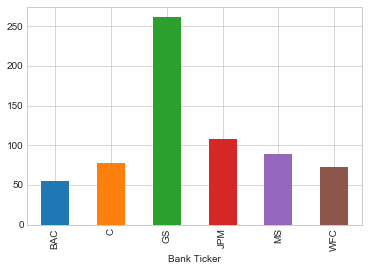

In [19]:
max_close_value.plot(kind='bar')

Goldman Sachs clearly has much higher value compared to other banks.

I will plot a graph to understand the trend of closing prices of all the stocks for the time series data.

In [22]:
# Creating dataframe for returns values
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


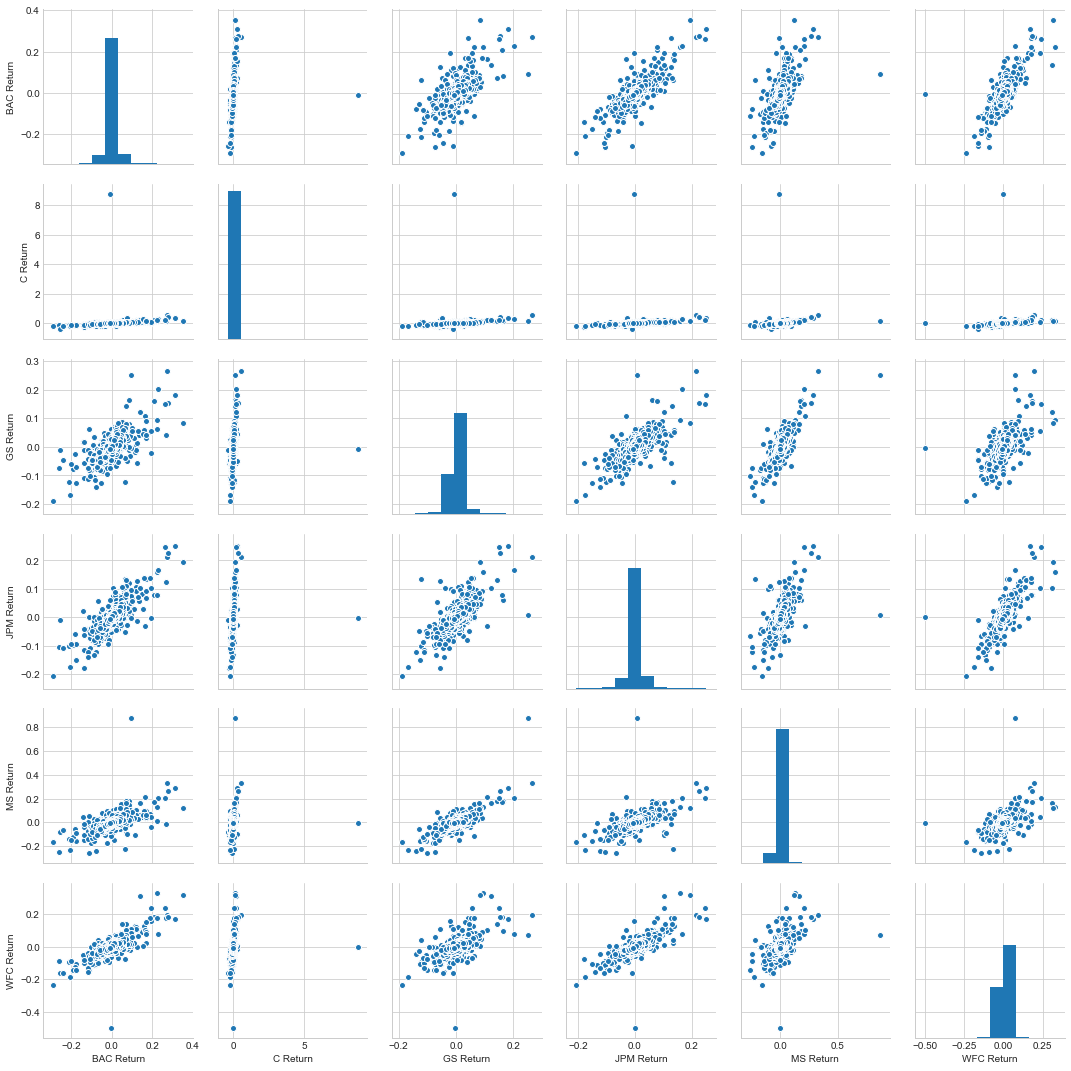

In [23]:
# Pairplot comparing differnt variables 
sns.pairplot(returns[1:])

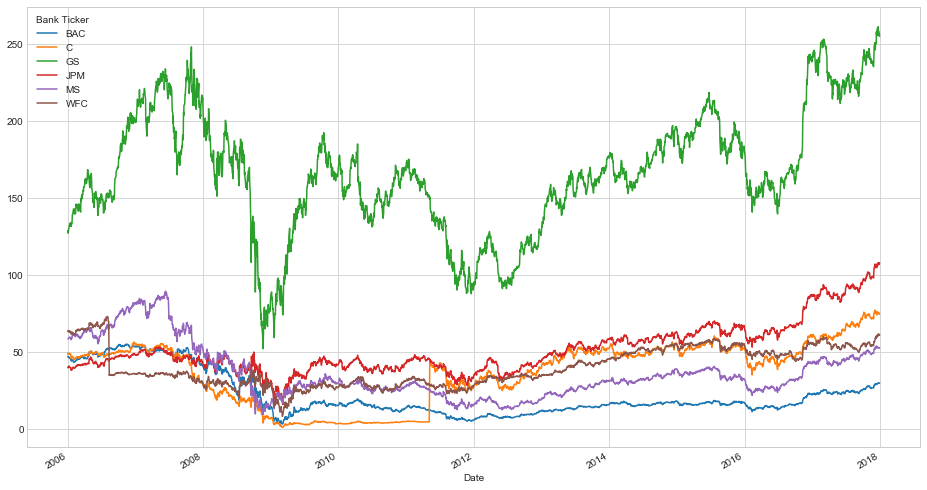

In [39]:
# Trend of stock closing prices
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(16,9),label=tick)

We can evidently notice that all stock prices plummeted during 2009, caused by the great recession. Goldman Sachs was hit the hardest but it showed a quick recovery as we approach 2010.

We also notice an anomalous behavior of Citigroup during the same time. Their stock prices were on a free fall during that time frame but it took a very long time to recover. They were able to do this with a series of major business changes.

Instead of boiling the ocean, I will narrow down the analysis to understand the behavior of Citi.

Let's plot moving average to of Citi bank for 2008 to 2009. 

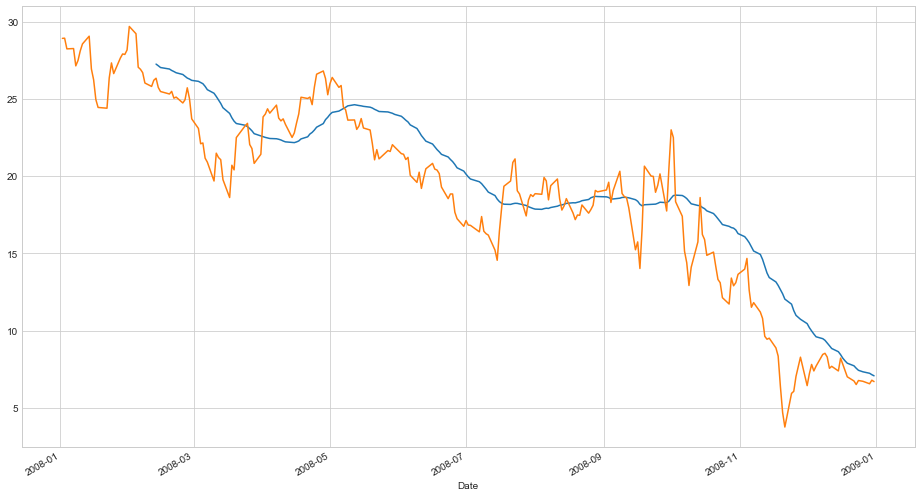

In [42]:
bank_stocks.ix['2008-01-01':'2008-12-31'].xs(key='Close',axis=1,level='Stock Info')['C'].rolling(window=30).mean().plot(figsize=(16,9))
bank_stocks.ix['2008-01-01':'2008-12-31'].xs(key='Close',axis=1,level='Stock Info')['C'].plot(figsize=(16,9))

### Rick analysis 
We can plot standard deviation to analyse the spread of the prices. Hence, standard deviation is directly proportional to the risk associated in investing in that particular stock.

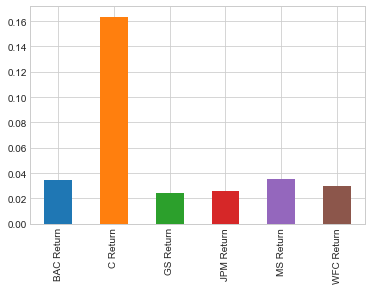

In [25]:
# Standard deviation of returns value
returns.std().plot(kind='bar')

As suspected, due to the anomalous behaviour of Citi from 2008 to 2012 standard deviation is very high.

Let's check standard deviation for last year.

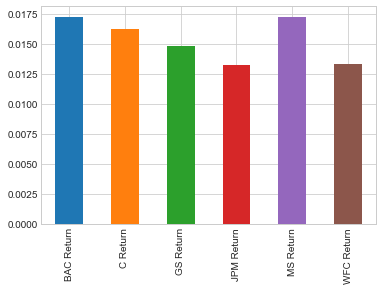

In [40]:
# Standard deviation from 2016 to 2017
returns.ix['2016-01-01':'2017-12-31'].std().plot(kind='bar')

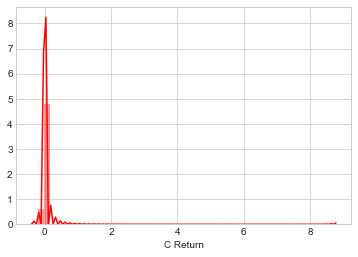

In [44]:
# Distribution of Citi 
sns.distplot(returns[1:]['C Return'], color='red')

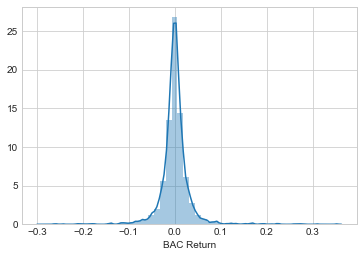

In [45]:
# Distribution of Bank of America 
sns.distplot(returns[1:]['BAC Return'])

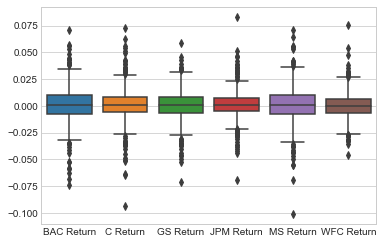

In [46]:
sns.boxplot(data=returns[1:].ix['2016-01-01':'2017-12-31'])

Box plot indicated that Morgan Stanley has higher spread and some outliers which increases the standard deviation.